--- 
# Introduction

---

## Contents

- [Introduction](#Introduction)
- [Data Strategy](#Data-Strategy)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Problem Statement

<font size = 3> The main goal of the College Board is to expand access to higher education throught standardized tests like the American College Testing(ACT) and the Standardized Aptitude Test(SAT). While there are states that have high level of participation in the SATs and ACTs allowing broad reach to higher education, some states have consistently low participation that is not in line with our goal.<br>
    
<font size = 3>We noticed that the SATs and ACTs participation rate for some states increased from 2016/17 to 2017/18. For this project, we would like to, if possible, replicate the success of these states, nased on the strategies and policies changes, if any. 

<font size = 3>This project aims to explore what can be further done to increase participation across low participation states based on successful examples

## Background

<font size = 3>I am a member of the team under Todd Huston, Senior Vice President, head of the State and Disctrict Partnerships of the College Board. We aim to allow for every student to have access to the courses. <br>
    
<font size = 3>Standardized tests like ACTs and SATs have been recognised for stong indicators on a student's capability to cope or excel in college, however, our main focus is now on widening the reach of standardized tests to students across USA.<br>
    
<font size = 3>For the SAT and ACT 2017/2018 test format, we implemented an additional July exam for ACT, bringing it up to a total of 7. For SAT, the January test was removed and the new August test was added. This grants seniors one more chance to take the SAT before applying to college in the fall. Coincidentally, this August test will grant students extra time to focus on SAT prep during the summer.
    
<font size = 3>While there are states with high participation, we noticed there are still a large number of states that have abysmally low participation. As part of our mission, our team has set out to find what attributed to the increase in participation rate, and if possible, improve the participation rate of the low-participation-rate states <font>

## Datasets Used

There are the followng datasets in the [`data`](./data/) folder used for this project.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`dataset_act_merge.csv`](../data/dataset_act_merge.csv): Merge Sat dataset

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object |ACT|Description of all 50 states + Washington DC| 
|act_participation_2017|float|ACT|Average participation rate for the respective state in the year 2017. This list allows us to focus on the states which have improved participation and how we can emulate its sessions through the changes implemented|
|act_composite_2017|float|ACT|Average composite score for the respective state in 2017. Composite score is the  mean scaled score for the 4 test parameters; (1)english (2)math (3)reading (4)science. This is computed based on the score for the each subject, the raw scores of each subject falls within a range of 1 to 36, the composite score is then tabulated by the mean scores of all 4 subjects. EG; if a student were to score 21 for math, 21 for english, 30 for reading and 30 for science, the composite score of the student will be tabulated as (21+21+30+30)/4 = 25.5  |
|act_participation_2018|float|ACT|Average participation rate for the respective state in the year 2018. By comparing the participation rate of ACT 2017, we can find out the changes made and attempt to find out the cause(s) behind the change and implement it via College Board partnerships|
|act_composite_2018|float|ACT|Average composite score for the respective state in 2018. While scores are not bell-curbed, elite US universities like those in the ivy league and equally competitive score, generally accept students who score well above average. A higher composite score gives you a better chance of entering into a more reputable or prestigious university |
|state|object |SAT|Aescription of all 50 states + Washington DC|
|sat_participation_2018|float|SAT|Average participation rate for the respective state in the year 2018|
|sat_reading_writing_2018|int|SAT|Average score for reading and writing test for the respective state in 2018. Score of this component ranges from 200 to 800. One cannot score below 200 for each component of the SAT score, nor can one score above 800.|
|sat_math_2018|int|SAT|Average score for math for the respective state in 2018. Similar to the reading writing component of SAT, this component score ranges from 200 to 800 too. |
|sat_total_2018|int|SAT|Sum of the 2 tests; math test and reading writing test for 2018. The score of this component is the addition of both the math component and the read writing component. giving it a range of 400 to 1600. As with composite score of ACT, the higher the SAT total score, the better chance it is to get into a better school|
|sat_participation_2017|float|SAT|Average participation rate for the respective state in the year 2017|
|sat_reading_writing_2017|int|SAT|Average score for reading and writing test for the respective state in 2017|
|sat_math_2017|int|SAT|Average score for math for the respective state in 2017|
|sat_total_2017|int|SAT|Sum of the 2 tests; math test and reading writing test for 2017|

---
# Data Strategy
---

## Library Imports

In [1]:
# Imports:
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Functions

Functions that will be used throughout the project

In [2]:
# Code:

"""code for mean calculation"""
def mean_calculate (input):
    X = sum(input)/len(input)
    return X


Function test 1

In [3]:
values_a = list(range(1,10)) #test list function check
mean_calculate(values_a) #function check

5.0

In [4]:
# Code: 

"""code for calculating standard deviation"""
def sd_calculate (input):
    """for standard deviation calculation using the function above"""
    cal_a = 0
    for elements_a in (input): 
        cal_a += ((elements_a - (mean_calculate(input)))**(2))
    cal_b = ((cal_a/(len(input)))**(1/2))
    return cal_b


Function test 2

In [5]:
# ___function check area 2___        
sd_calculate(values_a)     #function test

2.581988897471611

In [6]:
# Code:

def clean_float(input):
    i = input.replace('%', '')
    i = float(i)/100
    return i

Function test 3

In [7]:
x = '100%' #test value for float clean
clean_float(x) #function test

1.0

## Data Import

In [8]:
# Code:
dataset_sat2017 = pd.read_csv('../data/sat_2017.csv')
dataset_act2017 = pd.read_csv('../data/act_2017.csv')
dataset_sat2018 = pd.read_csv('../data/sat_2018.csv')
dataset_act2018 = pd.read_csv('../data/act_2018.csv')
dataset_sat2017.columns


Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

## Data Cleaning

### SAT_2017

#### SAT_2017 data

In [9]:
dataset_sat2017.describe() #check statistical data of sat_2017 data

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [10]:
dataset_sat2017.isnull().sum() #check sat_2017 data for null values

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### SAT_2017 cleaning

Compare (reading + math) with total, factoring in rounding. due to mean value of state

In [11]:
dataset_sat2017[((dataset_sat2017['Total'] - 
  dataset_sat2017['Evidence-Based Reading and Writing'] - 
  dataset_sat2017['Math']
) 
> 1
)
== True] #check for erroneous error for total and to find corresponding row of error


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [12]:
#Amend erroneous data at row index 20, using .at() since it is a single value
dataset_sat2017.at[20, 'Math'] = '524'

Check if Dtype is corresponds to the element accurately

In [13]:
dataset_sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Apply clean float function to convert participation Dtype to float

In [14]:
dataset_sat2017['Participation'] = dataset_sat2017['Participation'].map(clean_float)
dataset_sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


Lowercase dataset columns

In [15]:
dataset_sat2017.columns = dataset_sat2017.columns.str.lower()

In [16]:
dataset_sat2017.columns #check columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')

## SAT_2018

#### SAT_2018 data

In [17]:
dataset_sat2018.describe() #check statistical data of sat_2018

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [18]:
dataset_sat2018.isnull().sum() #check sat_2018 data for null values

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### SAT_2018 cleaning

Compare (reading + math) with total, factoring in rounding. due to mean value of state

In [19]:
dataset_sat2018[((dataset_sat2018['Total'] - #check for erroroneous input for total
 dataset_sat2018['Evidence-Based Reading and Writing'] - 
 dataset_sat2018['Math']) > 1) == True]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


Apply clean float function to convert participation Dtype to float

In [20]:
"""using clean_float function to change string to float for Participation series"""
dataset_sat2018['Participation'] = dataset_sat2018['Participation'].map(clean_float) 
dataset_sat2018.head(7)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076
5,Colorado,1.00,519,506,1025
6,Connecticut,1.00,535,519,1053


Lowercas dataset columns

In [21]:
dataset_sat2018.columns = dataset_sat2018.columns.str.lower()

Check for difference in states for both Dataset before merge

In [22]:
dataset_sat2018.loc[dataset_sat2018['state'] != dataset_sat2017['state'],:]

,state,participation,evidence-based reading and writing,math,total
35,Oklahoma,0.08,541,521,1062
36,Ohio,0.18,552,547,1099


In [23]:
dataset_sat2017.loc[dataset_sat2018['state'] != dataset_sat2017['state'],:]

,state,participation,evidence-based reading and writing,math,total
35,Ohio,0.12,578,570,1149
36,Oklahoma,0.07,530,517,1047


States difference for dataset is due to indexing, the states are still the same.
Merge both datasets

In [24]:
dataset_sat_merge = dataset_sat2018.merge(dataset_sat2017, on ='state')
"""merge sat2018 and 2017"""
dataset_sat_merge.head()

,state,participation_x,evidence-based reading and writing_x,math_x,total_x,participation_y,evidence-based reading and writing_y,math_y,total_y
0,Alabama,0.06,595,571,1166,0.05,593,572,1165
1,Alaska,0.43,562,544,1106,0.38,547,533,1080
2,Arizona,0.29,577,572,1149,0.30,563,553,1116
3,Arkansas,0.05,592,576,1169,0.03,614,594,1208
4,California,0.60,540,536,1076,0.53,531,524,1055


In [25]:
dataset_sat_merge.columns #check for columns

Index(['state', 'participation_x', 'evidence-based reading and writing_x',
       'math_x', 'total_x', 'participation_y',
       'evidence-based reading and writing_y', 'math_y', 'total_y'],
      dtype='object')

Renaming the columns and checking

In [26]:
new_columns_sat_dict= {
    'participation_x' : 'sat_participation_2018',
    'evidence-based reading and writing_x': 'sat_reading_writing_2018',
    'math_x' : 'sat_math_2018',
    'total_x' : 'sat_total_2018',
    'participation_y' : 'sat_participation_2017',
    'evidence-based reading and writing_y': 'sat_reading_writing_2017',
    'math_y' : 'sat_math_2017',
    'total_y' : 'sat_total_2017',
}
#renaming new column name for better readability
dataset_sat_merge.rename(columns = new_columns_sat_dict, inplace = True)
dataset_sat_merge.head(7)

,state,sat_participation_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017
0,Alabama,0.06,595,571,1166,0.05,593,572,1165
1,Alaska,0.43,562,544,1106,0.38,547,533,1080
2,Arizona,0.29,577,572,1149,0.30,563,553,1116
3,Arkansas,0.05,592,576,1169,0.03,614,594,1208
4,California,0.60,540,536,1076,0.53,531,524,1055
5,Colorado,1.00,519,506,1025,0.11,606,595,1201
6,Connecticut,1.00,535,519,1053,1.00,530,512,1041


## Dataset_sat_merge

Save data_set_merge to csv file

In [27]:
type(dataset_sat_merge)

pandas.core.frame.DataFrame

In [28]:
#check for null values
dataset_sat_merge.isnull().sum()

state                       0
sat_participation_2018      0
sat_reading_writing_2018    0
sat_math_2018               0
sat_total_2018              0
sat_participation_2017      0
sat_reading_writing_2017    0
sat_math_2017               0
sat_total_2017              0
dtype: int64

In [29]:
dataset_sat_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     51 non-null     object 
 1   sat_participation_2018    51 non-null     float64
 2   sat_reading_writing_2018  51 non-null     int64  
 3   sat_math_2018             51 non-null     int64  
 4   sat_total_2018            51 non-null     int64  
 5   sat_participation_2017    51 non-null     float64
 6   sat_reading_writing_2017  51 non-null     int64  
 7   sat_math_2017             51 non-null     int64  
 8   sat_total_2017            51 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.0+ KB


In [30]:
#save dataset to csv file
dataset_sat_merge.to_csv('../data/dataset_sat_merge.csv', index = False)

## ACT_2017

### Act_2017 data

In [31]:
dataset_act2017.describe() #check statistical data of sat_2018

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [32]:
dataset_act2017.isnull().sum() #check sat_2018 data for null values

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

### ACT_2017 cleaning

Check if Dtype is corresponds to the element accurately

In [33]:
dataset_act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

Map all values to float

In [34]:
# dataset_act2017['Composite'] = dataset_act2017['Composite'].map(float)
#code left as it is to show how 20.2x was derived

check row where dataset_act2017['Composite'] = 20.2x

In [35]:
dataset_act2017.loc[dataset_act2017['Composite'] == '20.2x',:]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


Assigning the correct composite score based on the average of the 4 input

In [36]:
dataset_act2017.loc[51,'Composite'] = 20.2

In [37]:
dataset_act2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

Float all elements of dataset_act2017 composite column

In [38]:
dataset_act2017['Composite'] = dataset_act2017['Composite'].map(float)
dataset_act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


Check if there is erronerous value for English, Math, Reading, Science and Composite

In [39]:
dataset_act2017[((dataset_act2017['Composite'] * 4 - 
 dataset_act2017['English'] - 
 dataset_act2017['Math'] -
 dataset_act2017['Reading'] -
 dataset_act2017['Science']
 ) 
 > 1)
== True]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Impute calculated value for 'Science' erroneous value

In [40]:
dataset_act2017.at[21, 'Science'] = (23.6*4 - 24.2 -23.1 -23.3)
dataset_act2017['Science'][21]

23.8

In [41]:
dataset_act2017.head(7)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8


Change participation column type from string to float

In [42]:
dataset_act2017['Participation'] = dataset_act2017['Participation'].map(clean_float)
dataset_act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


Lowercase dataset_act2017 columns

In [43]:
dataset_act2017.columns = dataset_act2017.columns.str.lower()

In [44]:
dataset_act2017.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

Check updated info for dataset_act2017 dataframe

In [45]:
dataset_act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     float64
 2   english        52 non-null     float64
 3   math           52 non-null     float64
 4   reading        52 non-null     float64
 5   science        52 non-null     float64
 6   composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


## ACT_2018

### ACT_2018 data

In [46]:
dataset_act2018.isnull().sum() #check dataset_act2018 for null values

State            0
Participation    0
Composite        0
dtype: int64

In [47]:
dataset_act2018.describe() #check statistical data of act2018

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


### ACT_2018 cleaning

Check duplicated row for states

In [48]:
dataset_act2018.loc[dataset_act2018['State'].duplicated(),:]

,State,Participation,Composite
20,Maine,7%,24.0


Drop duplicated value of act2018 State column

In [49]:
dataset_act2018.drop([19], inplace = True)
dataset_act2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


Reset act2018 index after dropping duplicate Maine

In [50]:
dataset_act2018.reset_index(inplace= True, drop = True)
dataset_act2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


Rename act2018 state name to match act2017

In [51]:
"""renaming Disctrict of columbia to District of Columbia"""
dataset_act2018['State'].replace({'District of columbia' : 'District of Columbia'
                                }, inplace = True)

apply cleanfloat function to act2018 participation column

In [52]:
dataset_act2018['Participation'] = dataset_act2018['Participation'
].map(clean_float)
"""check if float conversion done correctly"""
dataset_act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     float64
 2   Composite      51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


lowercase column name

In [53]:
dataset_act2018.columns = dataset_act2018.columns.str.lower()

In [54]:
dataset_act2018.head(2) #check columns and if cleaning done properly

,state,participation,composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8


## Dataset_act_merge

In [55]:
"""how = inner, state = national is only in 2017, removing it via merge"""
dataset_act_merge = dataset_act2017.merge(dataset_act2018, on = 'state' )

In [56]:
dataset_act_merge.head(7)

,state,participation_x,english,math,reading,science,composite_x,participation_y,composite_y
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,1.00,19.1
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.33,20.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.66,19.2
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,1.00,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.27,22.7
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.30,23.9
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,0.26,25.6


Create column renaming dictionary and apply to dataset_act_merge

In [57]:
new_columns_act_dict3 = {
    'participation_x' : 'act_participation_2017',
    'composite_x' : 'act_composite_2017',
    'english' : 'act_english_2017',
    'math' : 'act_math_2017',
    'reading' : 'act_reading_2017',
    'science' : 'act_science_2017',
    'participation_y' : 'act_participation_2018',
    'composite_y' : 'act_composite_2018'
}


dataset_act_merge.rename(columns = new_columns_act_dict3, inplace = True)


Drop act_english_2017, act_math_2017, act_reading_2017 and act_science_2017 as act2018 do not have these columns, no point in comparison

In [58]:
dataset_act_merge_drop = dataset_act_merge.drop(columns = ['act_english_2017', 'act_math_2017', 'act_reading_2017', 'act_science_2017'])

In [59]:
dataset_act_merge_drop.info() #check for 51 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   act_participation_2017  51 non-null     float64
 2   act_composite_2017      51 non-null     float64
 3   act_participation_2018  51 non-null     float64
 4   act_composite_2018      51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB


save both dropped and undrop dataframe to csv file

In [60]:
"""saving undropped act data"""
dataset_act_merge.to_csv('../data/dataset_act_merge.csv', index = False)

In [61]:
"""saving dropped act data"""
dataset_act_merge_drop.to_csv('../data/dataset_act_merge_drop.csv', index = False)


# Exploratory Data Analysis


## EDA PART 1a : Summary Statistics for ACT

Compare participation of states for act2017 and act2018

In [62]:
dataset_act_merge_drop.loc[:,['act_participation_2017', 'act_participation_2018']].describe()

,act_participation_2017,act_participation_2018
count,51.000000,51.000000
mean,0.652549,0.617255
std,0.321408,0.340371
min,0.080000,0.070000
25%,0.310000,0.285000
50%,0.690000,0.660000
75%,1.000000,1.000000
max,1.000000,1.000000


We notice from the mean that the act2017 has better participation than the act2018. From the lower standard deviation, act2017 has lower spread; and the act2017 participation across all states are more clustered around than the mean as compared to act2018. Although the 75th percentile is thte same for both act2017 and act2018, the 50percentile and 25percentile is lower, we can conclude that for the act2018, the participation for the states below 50 percentile is lower than for act2017

Compare composite score for act2017 and act2018

In [63]:
dataset_act_merge_drop.loc[:,['act_composite_2017', 'act_composite_2018']].describe()

,act_composite_2017,act_composite_2018
count,51.000000,51.000000
mean,21.519608,21.496078
std,2.020695,2.111583
min,17.800000,17.700000
25%,19.800000,19.950000
50%,21.400000,21.300000
75%,23.600000,23.650000
max,25.500000,25.600000


While for the composite score of act2017 and act2018 we notice that across all statistical scores, composite scores for act2017 and act2018 is actually somewhat similar.<br>

We can infer that the drop in participation did not lower the scores for act2018

##  EDA PART 1b : Summary Statistics for SAT

In [64]:
'check columns for merged sat dataset'
dataset_sat_merge.columns

Index(['state', 'sat_participation_2018', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_total_2018', 'sat_participation_2017',
       'sat_reading_writing_2017', 'sat_math_2017', 'sat_total_2017'],
      dtype='object')

In [65]:
#display statistical data for participation of sat2017 and sat2018
dataset_sat_merge.loc[:,['sat_participation_2017', 'sat_participation_2018']].describe()

,sat_participation_2017,sat_participation_2018
count,51.000000,51.000000
mean,0.398039,0.457451
std,0.352766,0.373143
min,0.020000,0.020000
25%,0.040000,0.045000
50%,0.380000,0.520000
75%,0.660000,0.775000
max,1.000000,1.000000


We noticed there is an increase in the participation for sat2018, as compared to sat2017. While there is a higher standard deviation value, which would suggest the participation for sat2018 is more spreaded. We noticed across all boards of statistical data, participation is higher in all, 25percentile, 50percentile, 75percentile. This would suggest that the increase in participation for sat2018 was an even increment across all most states, and not just a particular cluster of state; states belonging to any of the 4 quadrants

In [66]:
dataset_sat_merge.loc[:, ['sat_reading_writing_2017', 'sat_reading_writing_2018']].describe()

,sat_reading_writing_2017,sat_reading_writing_2018
count,51.000000,51.000000
mean,569.117647,563.686275
std,45.666901,47.502627
min,482.000000,480.000000
25%,533.500000,534.500000
50%,559.000000,552.000000
75%,613.000000,610.500000
max,644.000000,643.000000


we noticed a lower mean score for sat_reading_writing in 2018 than 2017. We noticed that sat_read_writing_2018 has a higher standard deviation, this translates to a wider spread of scores as compared to sat_read_writing_2017. 

We also noticed that for scores within 25th to 75th percentile of both sat2017 and sat2018 for reading and writing, sat2018 had largely lower scores, while the min and max scores are somewhat similar. we can conclude that the the lowered mean score is contributed by the scores within 25th and 75th percentile.

In [67]:
dataset_sat_merge.loc[:, ['sat_math_2017', 'sat_math_2018']].describe()

,sat_math_2017,sat_math_2018
count,51.000000,51.000000
mean,556.882353,556.235294
std,47.121395,47.772623
min,468.000000,480.000000
25%,523.500000,522.500000
50%,548.000000,544.000000
75%,599.000000,593.500000
max,651.000000,655.000000


Unlike the sat_reading_writing component, the mean of sat_math was largely unchanged from 2017. However we noticed that there is a difference of 6 for standard deviation, we can infer that there is a larger spread of scores for sat2018 math. 

Apart from the 25th percentile score, we also notice comparing all other min, 50th percentile, 75th percentile score, the math results were lower for sat2018.

In [68]:
dataset_sat_merge.loc[:, ['sat_total_2017', 'sat_total_2018']].describe()

,sat_total_2017,sat_total_2018
count,51.000000,51.000000
mean,1126.098039,1120.019608
std,92.494812,94.155083
min,950.000000,977.000000
25%,1055.500000,1057.500000
50%,1107.000000,1098.000000
75%,1212.000000,1204.000000
max,1295.000000,1298.000000


The total score for sat2017 and sat2018 has a different trend, since it is the sum of both components. Mean total score is lower by 6 points for sat2018 as compared to sat2017. While standard deviation is higher for sat2018, suggesting a wider spread, comparing min and max score, we noticed that the difference in max-minus-min is larger for 2017, 345(1295-950) for sat2017 as compared to 321(1298-977) for sat2018. This would mean that the scores are mostly spread further compared to the mean value.

## EDA PART 2

### Merge full sat and act dataframe

In [69]:
 dataset_act_merge.info() #check info of merged act data before merging with sat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   act_participation_2017  51 non-null     float64
 2   act_english_2017        51 non-null     float64
 3   act_math_2017           51 non-null     float64
 4   act_reading_2017        51 non-null     float64
 5   act_science_2017        51 non-null     float64
 6   act_composite_2017      51 non-null     float64
 7   act_participation_2018  51 non-null     float64
 8   act_composite_2018      51 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.0+ KB


In [70]:
dataset_sat_merge.info() #check info of merged sat data before merging with act

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     51 non-null     object 
 1   sat_participation_2018    51 non-null     float64
 2   sat_reading_writing_2018  51 non-null     int64  
 3   sat_math_2018             51 non-null     int64  
 4   sat_total_2018            51 non-null     int64  
 5   sat_participation_2017    51 non-null     float64
 6   sat_reading_writing_2017  51 non-null     int64  
 7   sat_math_2017             51 non-null     int64  
 8   sat_total_2017            51 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.0+ KB


In [71]:
# merge merged-sat data with merged-act data
dataset_full = dataset_sat_merge.merge(dataset_act_merge_drop, on = 'state')
dataset_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     51 non-null     object 
 1   sat_participation_2018    51 non-null     float64
 2   sat_reading_writing_2018  51 non-null     int64  
 3   sat_math_2018             51 non-null     int64  
 4   sat_total_2018            51 non-null     int64  
 5   sat_participation_2017    51 non-null     float64
 6   sat_reading_writing_2017  51 non-null     int64  
 7   sat_math_2017             51 non-null     int64  
 8   sat_total_2017            51 non-null     int64  
 9   act_participation_2017    51 non-null     float64
 10  act_composite_2017        51 non-null     float64
 11  act_participation_2018    51 non-null     float64
 12  act_composite_2018        51 non-null     float64
dtypes: float64(6), int64(6), object(1)
memory usage: 5.6+ KB


In [72]:
#getting all non string columns to calculate standard deviation
dataset_full.loc[:,dataset_full.columns!='state'].columns

Index(['sat_participation_2018', 'sat_reading_writing_2018', 'sat_math_2018',
       'sat_total_2018', 'sat_participation_2017', 'sat_reading_writing_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_composite_2017', 'act_participation_2018', 'act_composite_2018'],
      dtype='object')

In [73]:
#make a list comprehension for the data full dataset
sd = {columnN : round(sd_calculate(dataset_full[columnN]),3 #round to 3 decimal place
    ) for columnN in dataset_full.columns[dataset_full.columns != 'state']}

In [74]:
"""corrected to 3 decimal place"""
sd 


{'sat_participation_2018': 0.369,
 'sat_reading_writing_2018': 47.035,
 'sat_math_2018': 47.302,
 'sat_total_2018': 93.227,
 'sat_participation_2017': 0.349,
 'sat_reading_writing_2017': 45.217,
 'sat_math_2017': 46.657,
 'sat_total_2017': 91.584,
 'act_participation_2017': 0.318,
 'act_composite_2017': 2.001,
 'act_participation_2018': 0.337,
 'act_composite_2018': 2.091}

### Investigate SAT participation trend in the data.

In [75]:
dataset_full.columns

Index(['state', 'sat_participation_2018', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_total_2018', 'sat_participation_2017',
       'sat_reading_writing_2017', 'sat_math_2017', 'sat_total_2017',
       'act_participation_2017', 'act_composite_2017',
       'act_participation_2018', 'act_composite_2018'],
      dtype='object')

In [76]:
dataset_full.loc[:,['state','sat_participation_2017','sat_participation_2018']].sort_values(['sat_participation_2017'], ascending= False).head(10)

,state,sat_participation_2017,sat_participation_2018
8,District of Columbia,1.00,0.92
22,Michigan,1.00,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
29,New Hampshire,0.96,0.96
19,Maine,0.95,0.99
12,Idaho,0.93,1.00
9,Florida,0.83,0.56
21,Massachusetts,0.76,0.80
39,Rhode Island,0.71,0.97


As seen from the sorted participation for sat in 2017 and 2018, we observe that states which have high participation in2017, will generally maintain their high participation for 2018. 

In [77]:
dataset_full.loc[:,['state','sat_participation_2017','sat_participation_2018']].sort_values(['sat_participation_2017'], ascending= True).head(10)

,state,sat_participation_2017,sat_participation_2018
34,North Dakota,0.02,0.02
24,Mississippi,0.02,0.03
15,Iowa,0.02,0.03
25,Missouri,0.03,0.04
44,Utah,0.03,0.04
41,South Dakota,0.03,0.03
27,Nebraska,0.03,0.03
49,Wisconsin,0.03,0.03
23,Minnesota,0.03,0.04
50,Wyoming,0.03,0.03


Similarly for the low participation, States that have low participation rate in sat2017, are more likely to have low participation in sat2018

In [78]:
dataset_full.loc[:,['state','sat_participation_2017','sat_participation_2018']].sort_values(['sat_participation_2018'], ascending= False).head(10)

,state,sat_participation_2017,sat_participation_2018
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
22,Michigan,1.00,1.00
12,Idaho,0.93,1.00
19,Maine,0.95,0.99
13,Illinois,0.09,0.99
39,Rhode Island,0.71,0.97
29,New Hampshire,0.96,0.96
8,District of Columbia,1.00,0.92


when we sort ascending order for participation of sat2018, we noticed that Colorado, was originally a low participation state, this would be one of the states in which we can find out what changes or policies were implemented for the rise in participation

In [79]:
dataset_full.loc[:,['state','sat_participation_2017','sat_participation_2018']].sort_values(['sat_participation_2018'], ascending= True).head(10)

,state,sat_participation_2017,sat_participation_2018
34,North Dakota,0.02,0.02
50,Wyoming,0.03,0.03
41,South Dakota,0.03,0.03
27,Nebraska,0.03,0.03
49,Wisconsin,0.03,0.03
24,Mississippi,0.02,0.03
15,Iowa,0.02,0.03
44,Utah,0.03,0.04
23,Minnesota,0.03,0.04
18,Louisiana,0.04,0.04


We notice that for states with low participation rate in 2018, the states too had low participation rate in 2017. None of the states had a sudden drop from high participation rate to low participation rate. 

Colorado has a sharp increase in participation from sat2017 to sat2018, jumping from 11% to 100%
participation. 

With this information of states having huge increment of participation, we will be finding out states that fall under this category from sat2017 to sat2018. <br> this will be done so by utilising the factor ratio between participation of 2018 and 2017

In [80]:
dataset_full['sat_inc'] = dataset_full['sat_participation_2018']/dataset_full['sat_participation_2017']
dataset_full.loc[:, ['state', 'sat_participation_2017','sat_participation_2018', 'sat_inc']].sort_values(['sat_inc'], ascending = False).head(10)

,state,sat_participation_2017,sat_participation_2018,sat_inc
13,Illinois,0.09,0.99,11.000000
5,Colorado,0.11,1.00,9.090909
48,West Virginia,0.14,0.28,2.000000
3,Arkansas,0.03,0.05,1.666667
36,Ohio,0.12,0.18,1.500000
24,Mississippi,0.02,0.03,1.500000
15,Iowa,0.02,0.03,1.500000
31,New Mexico,0.11,0.16,1.454545
39,Rhode Island,0.71,0.97,1.366197
25,Missouri,0.03,0.04,1.333333


<font size = 3>Using participation increment, we found out that there were states with large increment for participation. For findings into the changes that resulted in increase, we will focus on states with 
participation that increased by 100% minimally, thus we will focus on the following states for SAT<br>1)Illinois<br>2)Colorado<br>3)West Virginia

### Investigate ACT participation trend in the data

In [81]:
dataset_full.loc[:,['state','act_participation_2017','act_participation_2018']].sort_values(['act_participation_2017'], ascending= False).head(10)

,state,act_participation_2017,act_participation_2018
0,Alabama,1.0,1.0
17,Kentucky,1.0,1.0
49,Wisconsin,1.0,1.0
44,Utah,1.0,1.0
42,Tennessee,1.0,1.0
40,South Carolina,1.0,1.0
35,Oklahoma,1.0,1.0
33,North Carolina,1.0,1.0
28,Nevada,1.0,1.0
26,Montana,1.0,1.0


In [82]:
dataset_full.loc[:,['state','act_participation_2017','act_participation_2018']].sort_values(['act_participation_2018'], ascending= False).head(10)

,state,act_participation_2017,act_participation_2018
0,Alabama,1.00,1.0
17,Kentucky,1.00,1.0
49,Wisconsin,1.00,1.0
44,Utah,1.00,1.0
42,Tennessee,1.00,1.0
40,South Carolina,1.00,1.0
36,Ohio,0.75,1.0
35,Oklahoma,1.00,1.0
33,North Carolina,1.00,1.0
28,Nevada,1.00,1.0


Similar to SAT participation of both years, states that have higher participation in act2017, are more likely to maintain their high participation for the next year, as shown in act2018

In [83]:
dataset_full.loc[:,['state','act_participation_2017','act_participation_2018']].sort_values(['act_participation_2017'], ascending= True).head(10)

,state,act_participation_2017,act_participation_2018
19,Maine,0.08,0.07
29,New Hampshire,0.18,0.16
7,Delaware,0.18,0.17
39,Rhode Island,0.21,0.15
38,Pennsylvania,0.23,0.20
20,Maryland,0.28,0.31
45,Vermont,0.29,0.24
21,Massachusetts,0.29,0.25
22,Michigan,0.29,0.22
46,Virginia,0.29,0.24


In [84]:
dataset_full.loc[:,['state','act_participation_2017','act_participation_2018']].sort_values(['act_participation_2018'], ascending= True).head(10)

,state,act_participation_2017,act_participation_2018
19,Maine,0.08,0.07
39,Rhode Island,0.21,0.15
29,New Hampshire,0.18,0.16
7,Delaware,0.18,0.17
38,Pennsylvania,0.23,0.20
22,Michigan,0.29,0.22
47,Washington,0.29,0.24
45,Vermont,0.29,0.24
46,Virginia,0.29,0.24
21,Massachusetts,0.29,0.25


The same trend is applicable for most states with low participation rate, states with low participation rate in 2017, are more likely to keep their low participation rate for the next year, evident from the participation for act2018

In [85]:
dataset_full['act_inc'] = dataset_full['act_participation_2018']/dataset_full['act_participation_2017']
dataset_full.loc[:, ['state', 'act_inc', 'act_participation_2017','act_participation_2018']].sort_values(['act_inc'], ascending = False).head()

,state,act_inc,act_participation_2017,act_participation_2018
36,Ohio,1.333333,0.75,1.00
27,Nebraska,1.190476,0.84,1.00
20,Maryland,1.107143,0.28,0.31
2,Arizona,1.064516,0.62,0.66
37,Oregon,1.050000,0.40,0.42


There is increment in the ACT, however the increase in participation is not as high for act2017 to act2018, compared to sat2107 to sat2018. <br> Since the jump in participation is higher for SAT, i will be focusing on SAT

### Investigate SAT scores trend

In [86]:
# Top 5 states with highest total sat2017 score
dataset_full.loc[:, ['state','sat_total_2017', 'sat_participation_2017']].sort_values(['sat_total_2017'], ascending = False
                        ).head()

,state,sat_total_2017,sat_participation_2017
23,Minnesota,1295,0.03
49,Wisconsin,1291,0.03
15,Iowa,1275,0.02
25,Missouri,1271,0.03
16,Kansas,1260,0.04


We notice that for sat2017, states with the highest total score are states with the lowest participation

In [87]:
# Top 5 states with highest total sat2018 score
dataset_full.loc[:, ['state','sat_total_2018', 'sat_participation_2018']
                             ].sort_values(['sat_total_2018'], ascending = False
                        ).head()

,state,sat_total_2018,sat_participation_2018
23,Minnesota,1298,0.04
49,Wisconsin,1294,0.03
34,North Dakota,1283,0.02
15,Iowa,1265,0.03
16,Kansas,1265,0.04


Similarly for sat2018, states with the highest total score are also states with lowest participation

In [88]:
# Top 5 states with lowest total sat2017 score
dataset_full.loc[:, ['state','sat_total_2017','sat_participation_2017']
                             ].sort_values(['sat_total_2017'], ascending = True
                        ).head()

,state,sat_total_2017,sat_participation_2017
8,District of Columbia,950,1.00
7,Delaware,996,1.00
12,Idaho,1005,0.93
22,Michigan,1005,1.00
19,Maine,1012,0.95


For Sat2017, we notice that states with the lowest total score, are states with high participation

In [89]:
# Top 5 states with lowest total sat2018 score
dataset_full.loc[:, ['state','sat_total_2018','sat_participation_2018']
                             ].sort_values(['sat_total_2018'], ascending = True
                        ).head()

,state,sat_total_2018,sat_participation_2018
8,District of Columbia,977,0.92
7,Delaware,998,1.00
48,West Virginia,999,0.28
12,Idaho,1001,1.00
44,Utah,1010,0.04


Following previous trends, states with low scores should belong to states with high participation, however, we notice that both Utah and West Virginia has relatively lower participation but still falls amongst the lowest 5 of the sat2018 lowest scores

To further confirm if high participation would result in drop of total scores, we will check for the scores of <br>1)Illinois <br>2)Colorado <br>3)West Virginia

In [90]:
dataset_full.loc[[13, 5, 48], ['sat_total_2017', 'sat_total_2018','sat_participation_2017','sat_participation_2018', 'state']].groupby('state').sum()

,sat_total_2017,sat_total_2018,sat_participation_2017,sat_participation_2018
state,,,,
Colorado,1201,1025,0.11,1.00
Illinois,1115,1019,0.09,0.99
West Virginia,1086,999,0.14,0.28


We noticed that when participation rate of sat increases, the total score decreases. Thus we can conclude that the states with high participation has much lower score score compared to states with low participation

Although utah does not fall under a high participation state relative to other states, the total score did decrease comparing sat2017 and sat2018. This further solidifies the trend that states with high participation have lower scores, as seen from the change in score from sat2017 and sat2018 for<br><br>1)Colorado<br>2)Illinois<br>3)West Virginia

### Investigate ACT scores trend

In [91]:
#check highest composite score for act2017
dataset_full.loc[:, ['state','act_composite_2017', 'act_participation_2017']
                             ].sort_values(['act_composite_2017'], ascending = False).head()

,state,act_composite_2017,act_participation_2017
29,New Hampshire,25.5,0.18
21,Massachusetts,25.4,0.29
6,Connecticut,25.2,0.31
19,Maine,24.3,0.08
8,District of Columbia,24.2,0.32


For the ACT2017, we notice that states with high act composite score are states with low participation rate

In [92]:
#check highest composite score for act2018 
dataset_full.loc[:, ['state','act_composite_2018', 'act_participation_2018']
                             ].sort_values(['act_composite_2018'], ascending = False).head()

,state,act_composite_2018,act_participation_2018
6,Connecticut,25.6,0.26
21,Massachusetts,25.5,0.25
29,New Hampshire,25.1,0.16
32,New York,24.5,0.27
22,Michigan,24.2,0.22


The trend follows for ACt2018, states with high scores are states with low participation rate

In [93]:
#check lowest composite score for act2017
dataset_full.loc[:, ['state','act_composite_2017', 'act_participation_2017']
                             ].sort_values(['act_composite_2017'], ascending = True).head()

,state,act_composite_2017,act_participation_2017
28,Nevada,17.8,1.0
24,Mississippi,18.6,1.0
40,South Carolina,18.7,1.0
11,Hawaii,19.0,0.9
33,North Carolina,19.1,1.0


For act2017, we see that states with the lowest score also belong to states high participation

In [94]:
#check lowest composite score for act2018 
dataset_full.loc[:, ['state','act_composite_2018', 'act_participation_2018']
                             ].sort_values(['act_composite_2018'], ascending = True).head()

,state,act_composite_2018,act_participation_2018
28,Nevada,17.7,1.00
40,South Carolina,18.3,1.00
24,Mississippi,18.6,1.00
11,Hawaii,18.9,0.89
0,Alabama,19.1,1.00


The trend follows for act2018, states with low composite score belong to states with high participation.

To check if act follows the trend that high participation states have low composite scores, we will compare the composite score for act2017 and act2018. for states wtih an increase in participation

In [95]:
dataset_full.loc[[36,27,20],['act_inc','act_participation_2017','act_participation_2018','act_composite_2017','act_composite_2018']]

,act_inc,act_participation_2017,act_participation_2018,act_composite_2017,act_composite_2018
36,1.333333,0.75,1.00,22.0,20.3
27,1.190476,0.84,1.00,21.4,20.1
20,1.107143,0.28,0.31,23.6,22.5


Once again, we observe for ACT, the 3 states with increased participation have decrease in composite score. We can firmly conclude that when states increase their participation rate, the average total score for the state drops

## Data Visualisation

Text(0.5, 1.0, 'Correlation of columns between dataset')

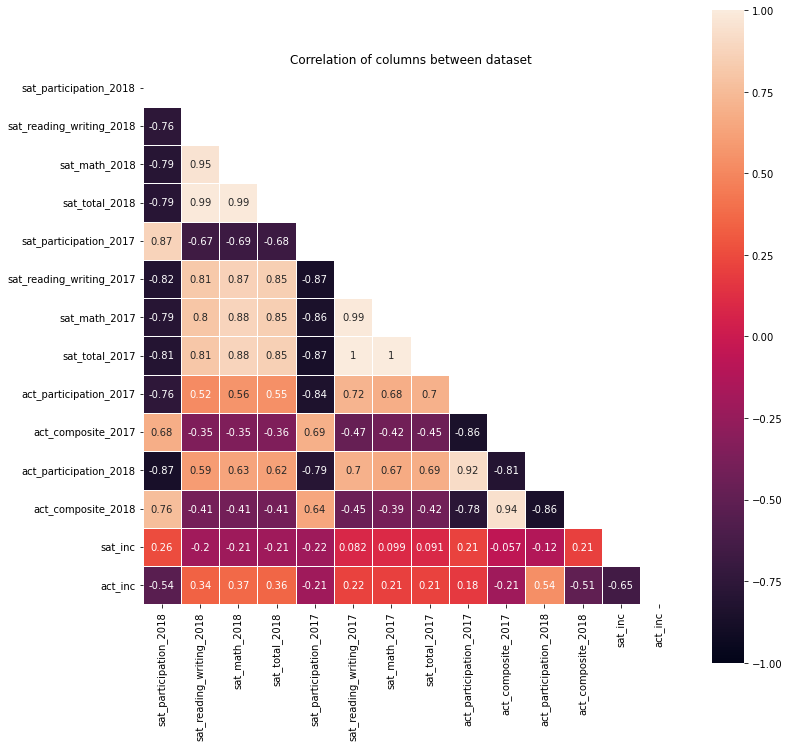

In [96]:
# Code
plt.figure(figsize = (12,12))
corr = dataset_full.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax= sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)
ax.set_title('Correlation of columns between dataset')

It is observed that act_participation_2017 and sat_participation_2017 has a correlation of -0.84, and act_participation_2018 and sat_participation_2018 has a correlation of -0.87, we can deduce that the participation of both ACT and SAT are inversely proportional, when participation of SAT increases, participation of ACT drops and vice versa.

Another observation is that the sat scores have negative correlation with the SAT tests; <br>sat_math_2018:sat_participation_2018 = -0.79,<br> sat_reading_writing_2018:sat_participation_2018 = -0.76,<br> sat_total_2018:sat_participation_2018 = -0.79,<br> sat_math_2017:sat_participation_2017 = -0.86, <br> sat_reading_writing_2017:sat_participation_2017 = -0.87, <br> sat_total_2017 : sat_participation_2017 = -0.87 . <br><br>Whilst for the ACT tests, <br>act_composite_2017 : act_participation_2017 = -0.86 <br> act_composite_2018 : act_participation_2018 = -0.86 <br><br> <font size=3>This further confirms that as participation increases,total score or composite scores decreases

In [97]:
dataset_full.columns

Index(['state', 'sat_participation_2018', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_total_2018', 'sat_participation_2017',
       'sat_reading_writing_2017', 'sat_math_2017', 'sat_total_2017',
       'act_participation_2017', 'act_composite_2017',
       'act_participation_2018', 'act_composite_2018', 'sat_inc', 'act_inc'],
      dtype='object')

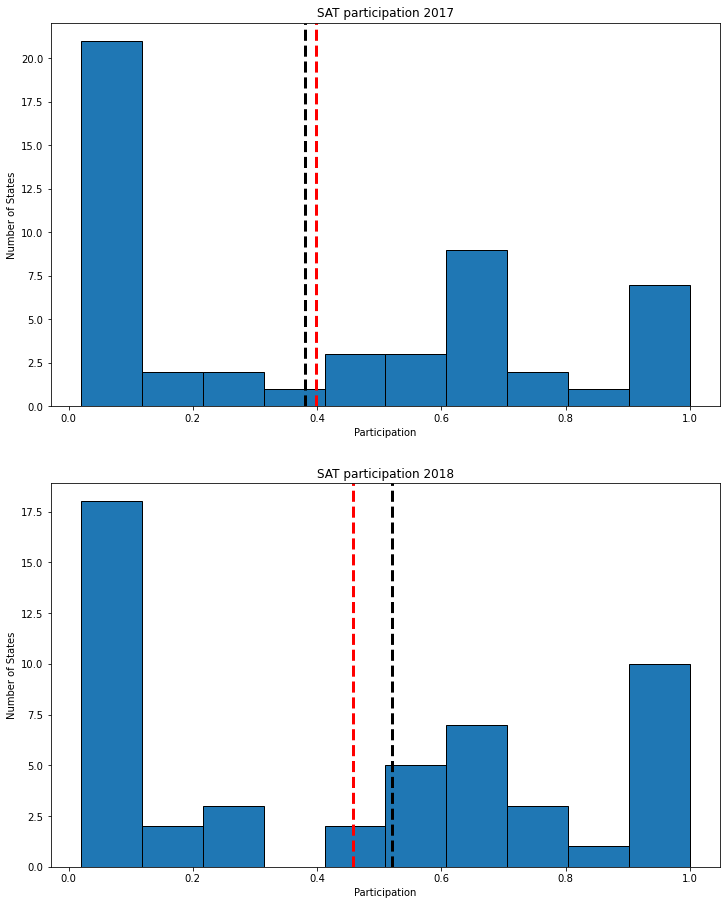

In [98]:
plt.figure(figsize = (12,24))

ax1 = plt.subplot(3,1,1)
ax1.set_title('SAT participation 2017')

x = dataset_full['sat_participation_2017']

ax1.hist(x, edgecolor= 'k')
plt.xlabel('Participation')
plt.ylabel('Number of States')
plt.axvline(x.mean(),
            color='red', linestyle = 'dashed', linewidth = 3)
plt.axvline(x.median(),
            color='k',linestyle = 'dashed', linewidth = 3)



ax2 = plt.subplot(3,1,2, sharex= ax1)
ax2.set_title('SAT participation 2018')


y=dataset_full['sat_participation_2018']
ax2.hist(y, edgecolor= 'k')



plt.xlabel('Participation')
plt.ylabel('Number of States')
plt.axvline(y.mean(),
            color='red', linestyle = 'dashed', linewidth = 3)
plt.axvline(y.median(),
            color='k',linestyle = 'dashed', linewidth = 3)



We observe that in general, both the median and mean participation of SAT2018 has been increased from SAT2017. There is a higher number of states with 100% participation and lower number of states with participation lower than 20%

Text(0.5, 1.0, 'SAT total score 2017')

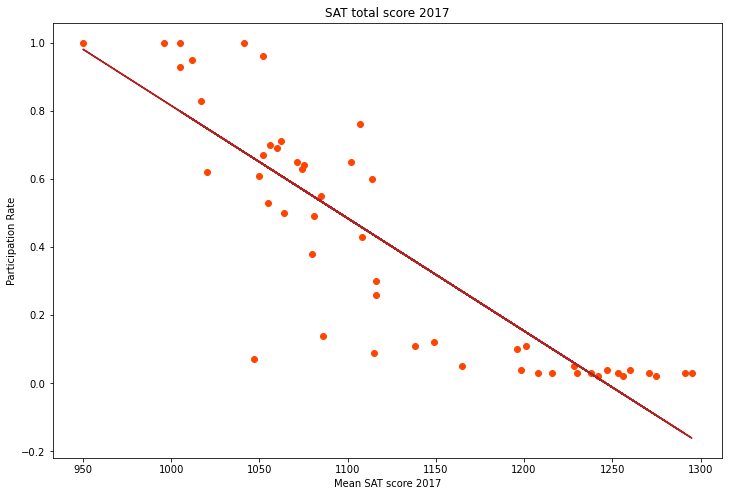

In [99]:
plt.figure(figsize = (12,8))

x = dataset_full['sat_total_2017']
y = dataset_full['sat_participation_2017']
m,b = np.polyfit(x,y,1)

plt.scatter(x,y, color = 'orangered')
plt.plot(x , m*x+b, color='firebrick')


plt.xlabel('Mean SAT score 2017')
plt.ylabel('Participation Rate')
plt.title('SAT total score 2017')

Text(0.5, 1.0, 'SAT total score 2018')

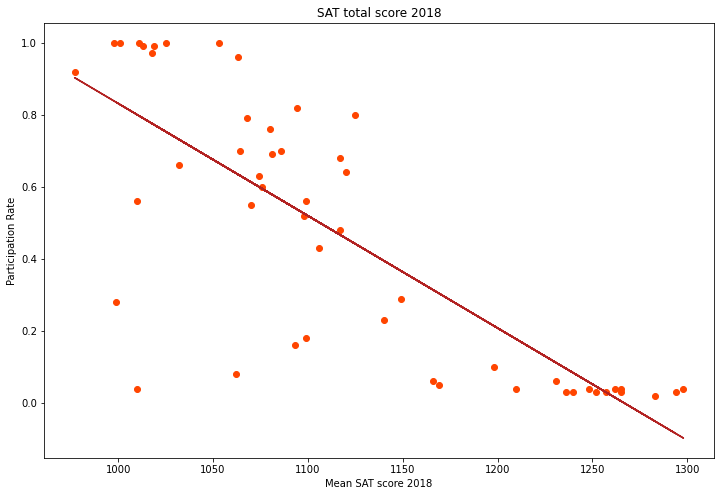

In [100]:
plt.figure(figsize = (12,8))

x = dataset_full['sat_total_2018']
y = dataset_full['sat_participation_2018']
m,b = np.polyfit(x,y,1)

plt.scatter(x,y, color = 'orangered')
plt.plot(x , m*x+b, color='firebrick')

plt.xlabel('Mean SAT score 2018')
plt.ylabel('Participation Rate')
plt.title('SAT total score 2018')

Interpretation 

<br>We notice that the mean score of SAT has dropped, which concludes the finding that from heatmap that when participation of the standardized test increases, the state mean score tends to drop, evidently from the mean total score

Text(0.5, 1.0, 'SAT Participation for 2017 and 2018')

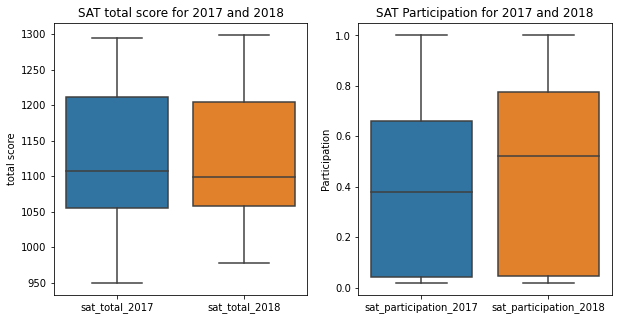

In [109]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(1,2,1)
ax1=sns.boxplot(data=dataset_full.loc[:,['sat_total_2017', 'sat_total_2018']]);
ax1.set_ylabel('total score')
ax1.set_title('SAT total score for 2017 and 2018')

ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(data=dataset_full.loc[:,['sat_participation_2017','sat_participation_2018']]);
ax2.set_ylabel('Participation')
ax2.set_title('SAT Participation for 2017 and 2018')

Text(0.5, 1.0, 'ACT Participation for 2017 and 2018')

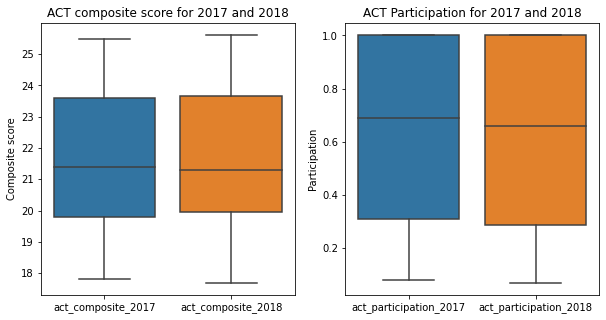

In [110]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(1,2,1)
ax1=sns.boxplot(data=dataset_full.loc[:,['act_composite_2017', 'act_composite_2018']]);
ax1.set_ylabel('Composite score')
ax1.set_title('ACT composite score for 2017 and 2018')

ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(data=dataset_full.loc[:,['act_participation_2017','act_participation_2018']]);
ax2.set_ylabel('Participation')
ax2.set_title('ACT Participation for 2017 and 2018')

<font size= 3>The trend that score decreases when participation increases is clearly depicted

Text(0.5, 1.0, 'ACT Participation for 2017 and 2018')

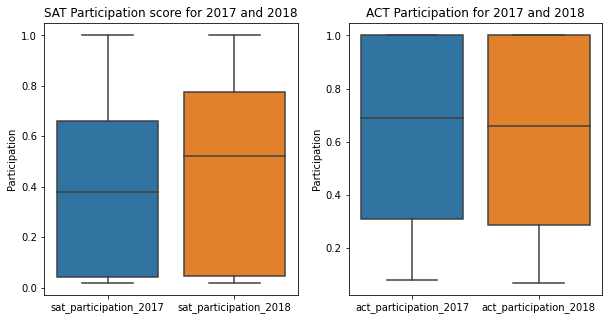

In [113]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(1,2,1)
ax1=sns.boxplot(data=dataset_full.loc[:,['sat_participation_2017', 'sat_participation_2018']]);
ax1.set_ylabel('Participation')
ax1.set_title('SAT Participation score for 2017 and 2018')

ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(data=dataset_full.loc[:,['act_participation_2017','act_participation_2018']]);
ax2.set_ylabel('Participation')
ax2.set_title('ACT Participation for 2017 and 2018')

<font size= 3>We noticed that when sat participation increases, act participation drops.

Text(0, 0.5, '% increment of participation')

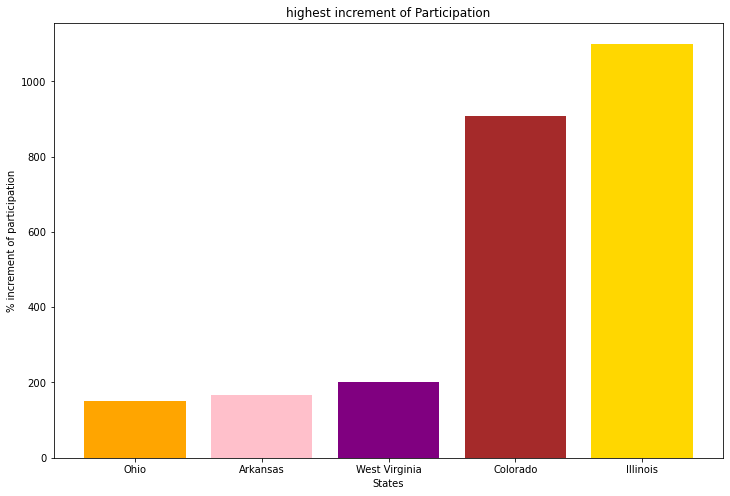

In [114]:
# x = dataset_full.sort_values(['test'], ascending = False)

inc1= (dataset_full.loc[dataset_full['state'] == 'Illinois', 'sat_inc'].max())*100
inc2= (dataset_full.loc[dataset_full['state'] == 'Colorado', 'sat_inc'].max())*100
inc3= (dataset_full.loc[dataset_full['state'] == 'West Virginia', 'sat_inc'].max())*100
inc4= (dataset_full.loc[dataset_full['state'] == 'Arkansas', 'sat_inc'].max())*100
inc5= (dataset_full.loc[dataset_full['state'] == 'Ohio', 'sat_inc'].max())*100

plt.figure(figsize = (12,8))

plt.bar(
['Ohio','Arkansas', 'West Virginia', 'Colorado', 'Illinois'],[inc5, inc4, inc3, inc2, inc1],
    color=['orange', 'pink', 'purple', 'brown', 'gold'] 
);

plt.title('highest increment of Participation')

plt.xlabel('States')
plt.ylabel('% increment of participation')

# ax.hist(x, edgecolor= 'k')
# plt.xlabel('Participation')
# plt.ylabel('Number of States')
# # plt.axvline(x.mean(),
# #             color='red', linestyle = 'dashed', linewidth = 3)
# # plt.axvline(x.median(),
# #             color='k',linestyle = 'dashed', linewidth = 3)

The top 5 states with ascending increment of participation from 2017-18, Colorado and Illinois has a whopping 900% and 1100%
increase respectively

Text(0, 0.5, '% of participation')

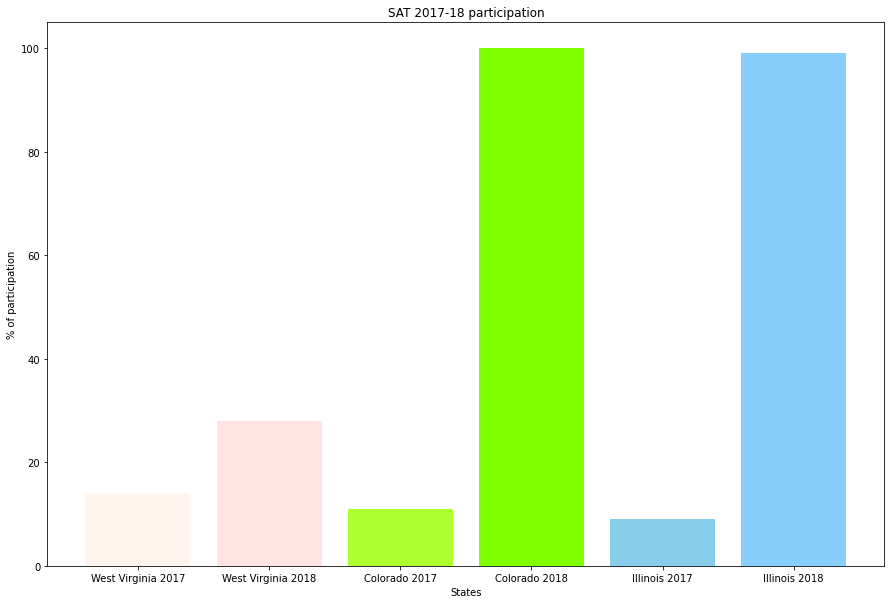

In [115]:
inca = dataset_full.loc[dataset_full['state'] == 'West Virginia', 'sat_participation_2017'].max()*100
incb = dataset_full.loc[dataset_full['state'] == 'West Virginia', 'sat_participation_2018'].min()*100
incc = dataset_full.loc[dataset_full['state'] == 'Colorado', 'sat_participation_2017'].max()*100
incd = dataset_full.loc[dataset_full['state'] == 'Colorado', 'sat_participation_2018'].min()*100
ince = dataset_full.loc[dataset_full['state'] == 'Illinois', 'sat_participation_2017'].max()*100
incf = dataset_full.loc[dataset_full['state'] == 'Illinois', 'sat_participation_2018'].min()*100

plt.figure(figsize = (15,10))

plt.bar(['West Virginia 2017', 'West Virginia 2018','Colorado 2017', 'Colorado 2018',
        'Illinois 2017', 'Illinois 2018'],[inca, incb, incc, incd, ince, incf], color=['seashell', 'mistyrose', 'greenyellow',
                                                                                      'chartreuse', 'skyblue', 'lightskyblue']);

plt.title('SAT 2017-18 participation')

plt.xlabel('States')
plt.ylabel('% of participation')


<font size=3>The key findings are as follow;

<font size=3>1)Total or Composite score has an inverse relationship with participation.<br>
<font size=3>2)When Sat participation increases, act participation drops<br>
<font size=3>3)The 3 states with more than a 100% increase in participation for SAT are West Virginia, Colorado and Illinois<br><br>
    
<font size=3>We will be researching into what caused the change in participation, especially for aforementioned 3 states

# Conclusions and Recommendations

## Outside Research

<font size = 3> Findings from external research that is relevant to findings and concliusions
    
|Website|Description|
|---|---|
|https://about.collegeboard.org/ | description of the goal and mission of the College Board. The College Board was created with the **aim to expand access through higher education via standardized tests; the ACTs and SATs**|
|https://collegereadiness.collegeboard.org/pdf/national-sat-validity-study-overview-admissions-enrollment-leaders.pdf | a study done by College Board based on data from mroe than 223,000 students across 171. The findings are, **SATs scores are a strong predictor of how well a student does in college**, this explains **why schools accept standardized tests as admission criteria** in conjunction with previous education years results |
|https://www.apu.edu/articles/college-admissions-why-standardized-testing-scores-matter/ | Article by Azusa Pacific University to further support on the **viability of standardized tests**. Students with strong SATs or ACTs are more likely to be accepted into colleges | 
|https://about.collegeboard.org/leadership/todd-huston | **Information on Todd Huston**, Senior Vice president, head of the State and District Partnerships. He directs key aspects of College Board strategy to ensure every student has access to coureses. |
|https://testive.com/colorado-sat-change-2017/ | In 2017, Colorado and College Board partnered to administer the SAT as the **State's accountability exam**. And **every junior will now have to take the the SAT**|
|https://www.edweek.org/teaching-learning/sat-scores-see-slight-increase-as-test-taking-surges/2018/10 |In 2017-18, **10 states** (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia) and the District of Columbia **covered the cost of the SAT for all their public school students**. Three years ago, only three states and the District of Columbia did so.|


## Summary

<font size = 3> The main goal of the College Board is to expand access to higher education throught standardized tests like the ACTs and the SATs. While there are states that have high level of participation in the SATs and ACTs allowing broard reach to higher education, some states have consistently low participation that is not in line with our goal. <br><br> This project aims to explore what can be further done to increase participation across low participation states based on successful examples<font>

<font size = 3> We found out through EDA, that there were specfically 3 states which had a large increase in SAT participation from 2017 to 2018. <br> These states were<br>1)Illinois - 1100%
<br>2)Colorado - 900%
<br>3)West Virginia - 200%<br>

<font size = 3><br> Illinois partnered up with College Board to administer the SAT as the state's accountability exam. And every Illinois high school juniors in 2017 will be taking the SAT Illinois has also covered the cost for the students partaking in the mandated SAT tests.  


<font size = 3><br><br>Likewise for Colorado, the state partnered up with College Board to implement the SAT as a statewide high school accountability, and every high school juniors is required to participate. Furthermore, the test is an official administration of the SAT and counts for college Admissions, and it is absolutely free for the students. <br><br>

<font size = 3>West Virginia was a different story, while the participation did go up by 100%, it didnt jump as much as Colorado or Illinois; which made SAT mandatory. West Virginia took a different approach and allowed for SAT to be taken for free, this was the main cause for the spike in number of test takers. 

## Conclusion

<font size = 3>In conclusion, we found out that there are 2 main reasons on why participation for SAT increased from 2017 to 2018, the first was that the states partnered up with College Board, mandating SAT to be compulsory. The second was that the states which had increase in participation made taking SAT free, this resulted in increase in participation ase seen from West Virgina participation in SAT 2017-18

<font size = 3>When pairing both reasons together, removing the cost from taking SAT and mandating it a requirement, participation of the states jumps to 100%. 

## Recommendations
<font size = 3>With the findings and conclusion from recent analysis, what we at College Board can do to improve participation and allow larger and wider reach of students to have access to these standardized tests, is to first remove the cost of these tests, this will spur a large increase of participants for the test.

<font size = 3>To further improve the participation rate, we can work with the various states which has yet to reach 100% participation, to mandate the SAT as a needed test for seniors to graduate for every high school juniors, like in Colorado and Illinois